In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')
plt.style.use('seaborn-poster')
%matplotlib inline

In [8]:
file_in = r'D:\Projects\Pr\3517.10\20170804_Piezometerdata\BATsensor_ProefstrookII.csv'
df = pd.read_csv(file_in, skiprows=0, encoding='cp1252', header=[1,2],tupleize_cols=True)

In [9]:
df.columns = pd.MultiIndex.from_tuples(df.columns)
df.head()

BAT II-1                                                      \
    103834        Date/Time       [Pa]       [°C]    Barometer   
0      NaN  11/6/2015 17:18  101293.05  15.666306  102215.2925   
1      NaN  11/6/2015 17:19  101300.61  15.669785  102215.2925   
2      NaN  11/6/2015 17:20  101307.91  15.673187  102215.2925   
3      NaN  11/6/2015 17:21  101302.27  15.675781  102215.2925   
4      NaN  11/6/2015 17:22  101304.20  15.680740  102215.2925   

                                             BAT II-2                   \
  Barometer gecorrigeerd voor barodrukken WL   103837        Date/Time   
0                                101813.2925      NaN  11/6/2015 17:12   
1                                101813.2925      NaN  11/6/2015 17:13   
2                                101813.2925      NaN  11/6/2015 17:14   
3                                101813.2925      NaN  11/6/2015 17:15   
4                                101813.2925      NaN  11/6/2015 17:16   

                              ...        BAT II-5                              \
        [Pa]       [°C]       ...          103830        Date/Time       [Pa]   
0  101220.20  15.052948       ...             NaN  11/6/2015 17:14  100981.46   
1  101237.00  15.047653       ...             NaN  11/6/2015 17:15  100842.82   
2  101237.08  15.055939       ...             NaN  11/6/2015 17:16  100621.80   
3  101232.74  15.065247       ...             NaN  11/6/2015 17:17  100422.78   
4  101243.10  15.069641       ...             NaN  11/6/2015 17:18  100264.17   

                              BAT II-6                                         \
        [°C] Baro-waarde [Pa]   103831        Date/Time       [Pa]       [°C]   
0  13.889236      102207.9380      NaN  11/6/2015 17:10  104211.37  11.733185   
1  13.839539      102215.2925      NaN  11/6/2015 17:11  104204.55  11.738998   
2  13.781494      102215.2925      NaN  11/6/2015 17:12  104208.52  11.735855   
3  13.724792      102215.2925      NaN  11/6/2015 17:13  100677.38  11.735931   
4  13.678497      102215.2925      NaN  11/6/2015 17:14  104689.56  13.321243   

                    
  Baro-waarde [Pa]  
0       102207.938  
1       102207.938  
2       102207.938  
3       102207.938  
4       102207.938  

[5 rows x 31 columns]

In [10]:
df_col_BAT = ['BAT II-1','BAT II-2','BAT II-3','BAT II-4','BAT II-5','BAT II-6']
df_col_par = ['Date/Time',' [Pa]',' [°C]','Barometer']

In [15]:
periods = {  
    'II_10': [
        ('start_dt', '2015-11-10 9:00'),
        ('end_dt',   '2015-11-10 11:00'),
    ],
    'II_25': [
        ('start_dt', '2015-11-10 11:00'),
        ('end_dt',   '2015-11-10 13:00'),
    ],
    'II_50': [
        ('start_dt', '2015-11-10 13:00'),
        ('end_dt',   '2015-11-10 15:00'),
    ],
    'II_85': [
        ('start_dt', '2015-11-10 15:00'),
        ('end_dt',   '2015-11-10 17:00'),
    ],
    'II_125': [
        ('start_dt', '2015-11-11 09:00'),
        ('end_dt',   '2015-11-11 11:00'),
    ],
    'II_170': [
        ('start_dt', '2015-11-11 11:00'),
        ('end_dt',   '2015-11-11 12:00'),
    ],    
}

II_170
BAT II-1
BAT II-2
BAT II-3
BAT II-4
BAT II-5
BAT II-6


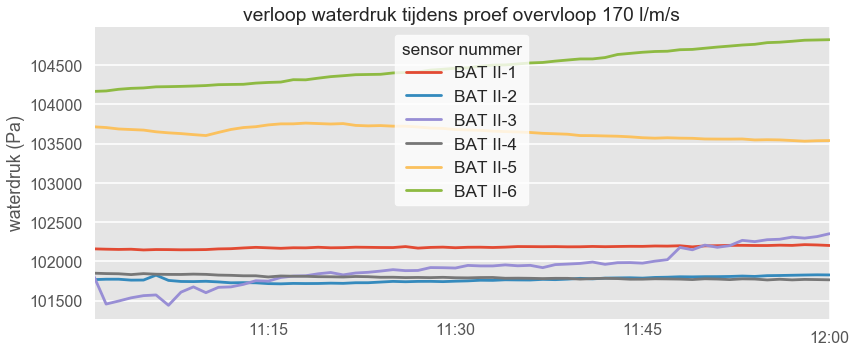

II_125
BAT II-1
BAT II-2
BAT II-3
BAT II-4
BAT II-5
BAT II-6


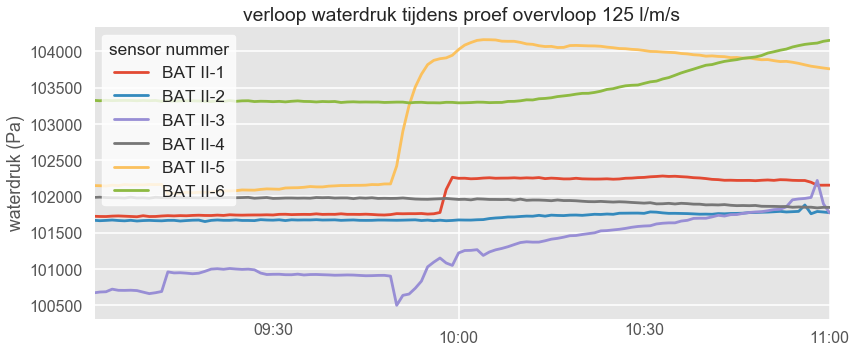

II_25
BAT II-1
BAT II-2
BAT II-3
BAT II-4
BAT II-5
BAT II-6


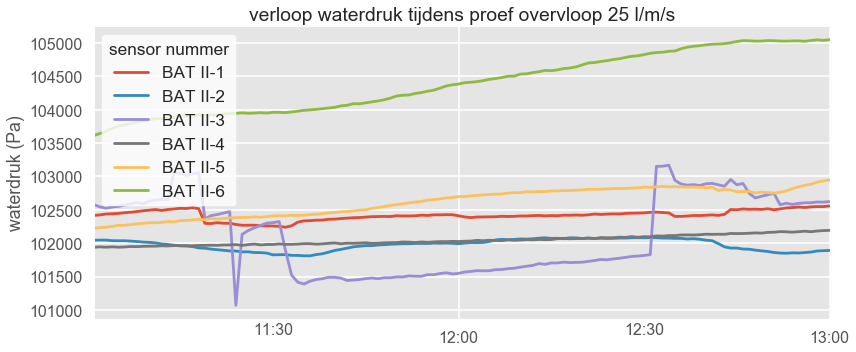

II_50
BAT II-1
BAT II-2
BAT II-3
BAT II-4
BAT II-5
BAT II-6


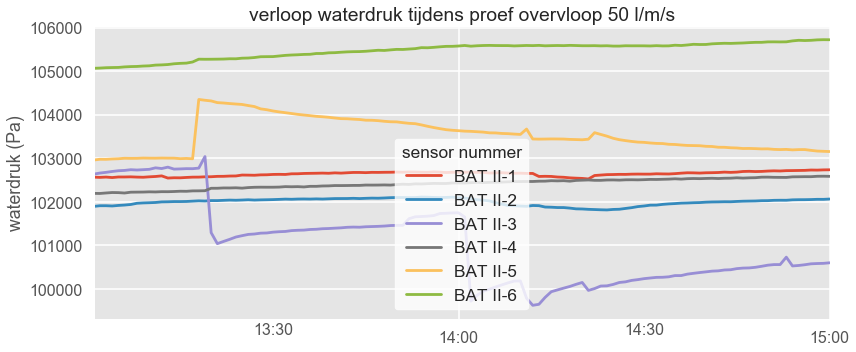

II_85
BAT II-1
BAT II-2
BAT II-3
BAT II-4
BAT II-5
BAT II-6


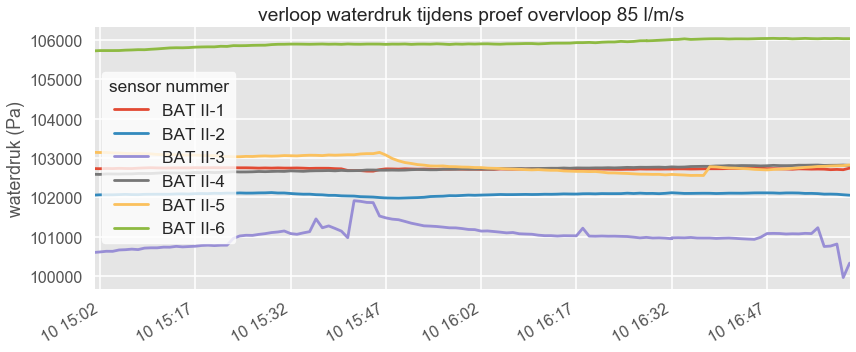

II_10
BAT II-1
BAT II-2
BAT II-3
BAT II-4
BAT II-5
BAT II-6


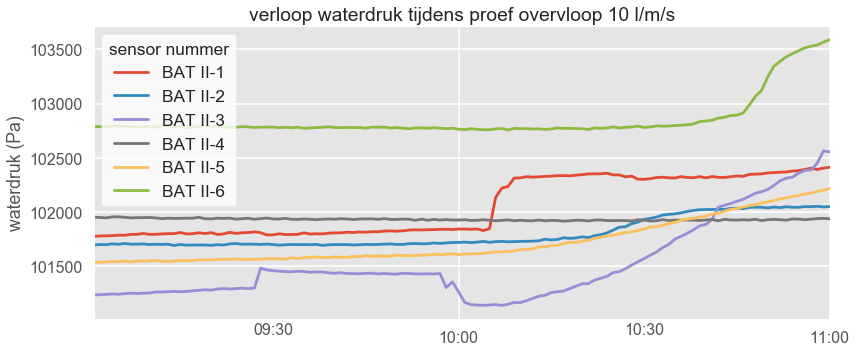

In [20]:
for per in periods:
    print (per)
    start_dt = periods[per][0][1] # start_dt
    end_dt   = periods[per][1][1] # end_dt

    df_comb = pd.DataFrame()
    for col in df_col_BAT:
        print(col)
        df.loc[:,(col,df_col_par[0])] = pd.to_datetime(df[(col,df_col_par[0])], format='%m/%d/%Y %H:%M', errors='raise')
        period = (df[(col,df_col_par[0])] > pd.Timestamp(start_dt)) & (df[(col,df_col_par[0])] <= pd.Timestamp(end_dt))    
        df_sel = pd.DataFrame(data=df[(col,df_col_par[1])].loc[period].values, index=df[(col,df_col_par[0])].loc[period].values, columns=[col])
        df_comb = df_comb.join(df_sel, how='outer')

    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
    df_comb.plot(title='verloop waterdruk tijdens proef overvloop '+str(per[3::])+' l/m/s', ax=ax)
    ax.set_ylabel('waterdruk (Pa)')

    #legend
    leg = ax.legend(fontsize = 'xx-large',frameon=True)
    leg.set_title(title='sensor nummer', prop = {'size':'xx-large'})
    frame = leg.get_frame()
    frame.set_color('white')

    #show
    plt.tight_layout()
    plt.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\2017-10-18 plots//waterdruk_'+per+'.png', dpi=100)
    plt.show()
    df_comb.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2017-10-18 plots//waterdruk_'+per+'.csv')

Geen metingen beschikbaar voor golfoverslag proeven van de BAT sensor op proefstrook III. Metingen op proefstrook II beginnen